# Assignment 1: Building a Better Contact Sheet
In the lectures for this week you were shown how to make a contact sheet for digital photographers, and how you can take one image and create nine different variants based on the brightness of that image. In this assignment you are going to change the colors of the image, creating variations based on a single photo. There are many complex ways to change a photograph using variations, such as changing a black and white image to either "cool" variants, which have light purple and blues in them, or "warm" variants, which have touches of yellow and may look sepia toned. In this assignment, you'll be just changing the image one color channel at a time

Your assignment is to learn how to take the stub code provided in the lecture (cleaned up below), and generate the following output image:

![](./readonly/assignment1.png "")

From the image you can see there are two parameters which are being varied for each sub-image. First, the rows are changed by color channel, where the top is the red channel, the middle is the green channel, and the bottom is the blue channel. Wait, why don't the colors look more red, green, and blue, in that order? Because the change you to be making is the ratio, or intensity, or that channel, in relationship to the other channels. We're going to use three different intensities, 0.1 (reduce the channel a lot), 0.5 (reduce the channel in half), and 0.9 (reduce the channel only a little bit).

For instance, a pixel represented as (200, 100, 50) is a sort of burnt orange color. So the top row of changes would create three alternative pixels, varying the first channel (red). one at (20, 100, 50), one at (100, 100, 50), and one at (180, 100, 50). The next row would vary the second channel (blue), and would create pixels of color values (200, 10, 50), (200, 50, 50) and (200, 90, 50).

Note: A font is included for your usage if you would like! It's located in the file `readonly/fanwood-webfont.ttf`

Need some hints? Use them sparingly, see how much you can get done on your own first! The sample code given in the class has been cleaned up below, you might want to start from that.

In [1]:
# libraries plus read in gif and convert into RGB object
import PIL
from PIL import Image

# read image and convert to RGB
image_original = Image.open("readonly/msi_recruitment.gif")

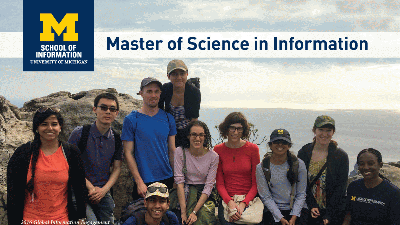

In [2]:
# display original image at 50 % size
display(image_original.resize((int(image_original._size[0]/2), int(image_original._size[1]/2))))

In [4]:
import numpy as np

# get rgb channels separated to manipulate
rgb_colors = ['red', 'green', 'blue']
image = image_original.convert('RGB')
red, green, blue = image.split()

# create nuances of RGB intensity for every channel in general 0.1 steps
col_nuances = np.around(np.linspace(0, 1, 11), decimals = 1).tolist()
red = [red.point(lambda i: i * x) for x in col_nuances]
green = [green.point(lambda i: i * x) for x in col_nuances]
blue = [blue.point(lambda i: i * x) for x in col_nuances]
nuances = dict(zip(rgb_colors, [red, green, blue]))

# create all variations of original image
images = {"red": [], "green": [], "blue": []}
idx_orig = len(red) - 1
for i in range(len(col_nuances) - 1):
    images['red'].append(Image.merge('RGB', (nuances['red'][i], nuances['green'][idx_orig], nuances['blue'][idx_orig])))
    images['green'].append(Image.merge('RGB', (nuances['red'][idx_orig], nuances['green'][i], nuances['blue'][idx_orig])))
    images['blue'].append(Image.merge('RGB', (nuances['red'][idx_orig], nuances['green'][idx_orig], nuances['blue'][i])))

In [9]:
def modify_image(images, rgb_colour_mod, intensity, scaling_factor = 1):
    
    """Takes the generated dictionary of RGB intensity variations and applies for desired colour to modify
        the desired intensity factor. Allows to rescale the size of the image."""
    
    from PIL import ImageDraw, ImageFont
    rgb_colors = ['red', 'green', 'blue']
    
    image = images[rgb_colour_mod][col_nuances.index(intensity)]
    image = (image.resize((int(image._size[0]/scaling_factor), int(image._size[1]/scaling_factor))))
    image_draw = ImageDraw.Draw(image)  
    
    # Generate blank black box 1.1 original size for text to bottom
    box = Image.new('RGBA', (image.width, int(image.height*1.10)), (0, 0, 0))
    box_draw = ImageDraw.Draw(box)
    # get font and write specification as text
    font = ImageFont.truetype("readonly/fanwood-webfont.ttf", int(55/scaling_factor))
    msg = "channel {} intensity {}".format(rgb_colors.index(rgb_colour_mod), col_nuances[col_nuances.index(intensity)])
    # decide which rgb intensity for text color
    rgb_col_fill = tuple([int(255*intensity) if col == rgb_colour_mod else 255 for col in rgb_colors])
    box_draw.text((0, int(image.height)), msg, font = font, fill = rgb_col_fill)
    
    # add original image to boxed background
    box.paste(image, (0, 0))
    return box

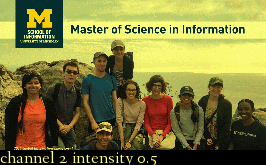

In [10]:
# Test the function
modify_image(images, 'blue', 0.5, scaling_factor = 3)

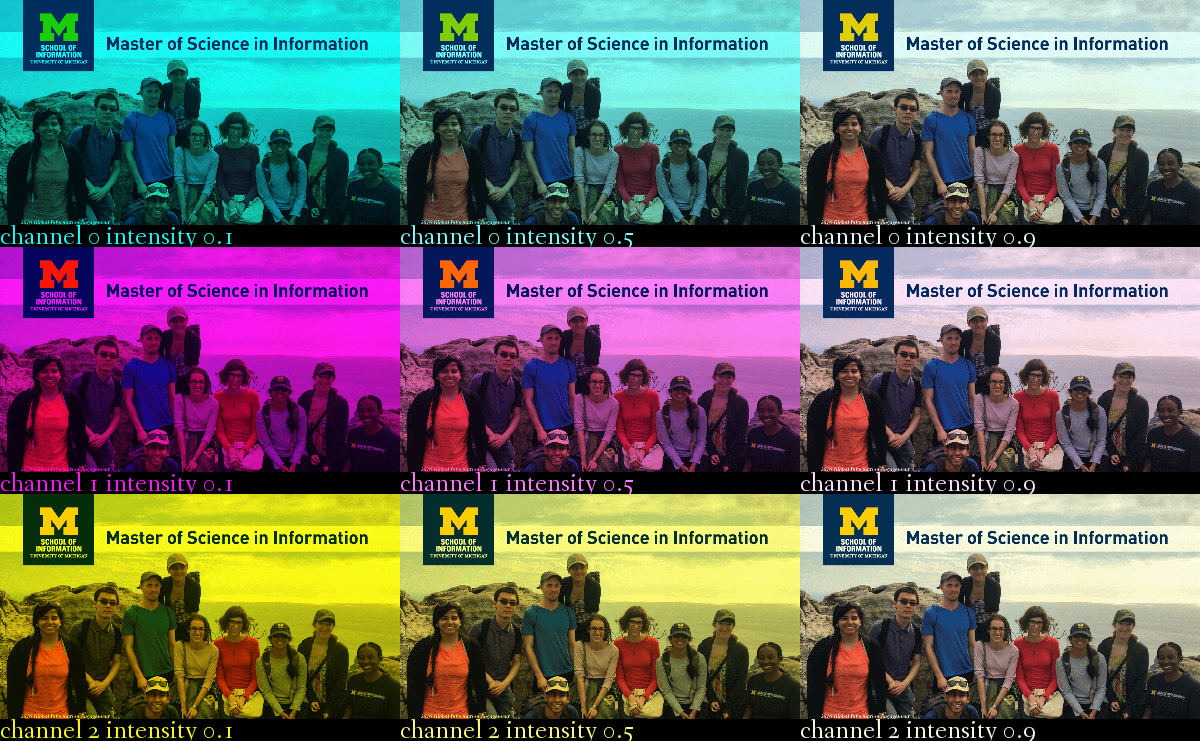

In [11]:
# combine desired colors and intensities into contact_sheet
intensities = [0.1, 0.5, 0.9]
final_images = []
for col in rgb_colors:
        for intensity in intensities:
            final_images.append(modify_image(images, col, intensity, scaling_factor = 2))

contact_sheet = PIL.Image.new(final_images[0].mode, (final_images[0].width*3, final_images[0].height*3))
x, y = (0, 0)
for img in final_images:
    contact_sheet.paste(img, (x, y) )
    if x + final_images[0].width == contact_sheet.width:
        x = 0
        y = y + final_images[0].height
    else:
        x = x + final_images[0].width

display(contact_sheet)

## HINT 1

Check out the `PIL.ImageDraw module` for helpful functions

## HINT 2

Did you find the `text()` function of `PIL.ImageDraw`?

## HINT 3

Have you seen the `PIL.ImageFont` module? Try loading the font with a size of 75 or so.

## HINT 4
These hints aren't really enough, we should probably generate some more.